In [2]:
import mne
import numpy as np
from pprint import pprint
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Replace with the path to your .fif file you want to explore
fif_file = '../data/openfmri/test/sub-06/run_01.fif'

# Read the raw data with preloading
raw = mne.io.read_raw_fif(fif_file, preload=True)
print(raw)

Opening raw data file ../data/openfmri/test/sub-06/run_01.fif...
    Range : 132000 ... 669899 =    120.000 ...   608.999 secs
Ready.
Reading 0 ... 537899  =      0.000 ...   488.999 secs...


/tmp/ipykernel_69085/3808848169.py:5: RuntimeWarning: This filename (../data/openfmri/test/sub-06/run_01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


<Raw | run_01.fif, 404 x 537900 (489.0 s), ~1.63 GB, data loaded>


# Previewing the data

#### Channel information

In [4]:
# number of channels
n_channels = raw.info['nchan']
print(f'Total number of channels: {n_channels}')

# channel types 
channel_types = raw.get_channel_types()
type_counts = Counter(channel_types)
print(f'Channel types: {type_counts}')

# channel names
channel_names = raw.ch_names
print(f'Channel names ({len(channel_names)}): {channel_names}')

Total number of channels: 404
Channel types: Counter({'grad': 204, 'mag': 102, 'eeg': 74, 'misc': 12, 'chpi': 9, 'stim': 3})
Channel names (404): ['MEG0113', 'MEG0112', 'MEG0111', 'MEG0122', 'MEG0123', 'MEG0121', 'MEG0132', 'MEG0133', 'MEG0131', 'MEG0143', 'MEG0142', 'MEG0141', 'MEG0213', 'MEG0212', 'MEG0211', 'MEG0222', 'MEG0223', 'MEG0221', 'MEG0232', 'MEG0233', 'MEG0231', 'MEG0243', 'MEG0242', 'MEG0241', 'MEG0313', 'MEG0312', 'MEG0311', 'MEG0322', 'MEG0323', 'MEG0321', 'MEG0333', 'MEG0332', 'MEG0331', 'MEG0343', 'MEG0342', 'MEG0341', 'MEG0413', 'MEG0412', 'MEG0411', 'MEG0422', 'MEG0423', 'MEG0421', 'MEG0432', 'MEG0433', 'MEG0431', 'MEG0443', 'MEG0442', 'MEG0441', 'MEG0513', 'MEG0512', 'MEG0511', 'MEG0523', 'MEG0522', 'MEG0521', 'MEG0532', 'MEG0533', 'MEG0531', 'MEG0542', 'MEG0543', 'MEG0541', 'MEG0613', 'MEG0612', 'MEG0611', 'MEG0622', 'MEG0623', 'MEG0621', 'MEG0633', 'MEG0632', 'MEG0631', 'MEG0642', 'MEG0643', 'MEG0641', 'MEG0713', 'MEG0712', 'MEG0711', 'MEG0723', 'MEG0722', 'MEG07

#### Sampling information
  

In [5]:
# number of samples
n_samples = raw.n_times
print(f'Number of samples (frames): {n_samples}')

# sampling frequency        
sfreq = raw.info['sfreq']
print(f'Sampling frequency: {sfreq} Hz')

# duration of recording 
duration = n_samples / sfreq
print(f'Duration of recording: {duration} seconds')

Number of samples (frames): 537900
Sampling frequency: 1100.0 Hz
Duration of recording: 489.0 seconds


## Accessign data format

#### Data info
- Data shape
- Data type

In [6]:
data = raw.get_data()

# Data shape
print(f'Data shape (n_channels x n_times): {data.shape}')

# Data type
print(f'Data type: {data.dtype}')

Data shape (n_channels x n_times): (404, 537900)
Data type: float64


#### Channel acess

In [7]:
# Channel Indices
eeg_indices = mne.pick_types(raw.info, meg=False, eeg=True)
meg_indices = mne.pick_types(raw.info, meg=True, eeg=False)
# print(f'EEG channel indices: {eeg_indices}')
print(f'Number of EEG channels: {len(eeg_indices)}')
print(f'Number of MEG channels: {len(meg_indices)}')

# EEG and MEG Data
eeg_data = data[eeg_indices, :]
meg_data = data[meg_indices, :]
print(f'EEG data shape: {eeg_data.shape}')
print(f'MEG data shape: {meg_data.shape}')

# Optional: Separate MEG magnetometers and gradiometers
mag_indices = mne.pick_types(raw.info, meg='mag')
grad_indices = mne.pick_types(raw.info, meg='grad')
print(f'\nNumber of MEG magnetometer channels: {len(mag_indices)}')
print(f'Number of gradiometer channels: {len(grad_indices)}')

Number of EEG channels: 74
Number of MEG channels: 306
EEG data shape: (74, 537900)
MEG data shape: (306, 537900)

Number of MEG magnetometer channels: 102
Number of gradiometer channels: 204


In [30]:
# Get indices of MEG channels
meg_indices = mne.pick_types(raw.info, meg=True, eeg=False)
print(f'Number of MEG channels: {len(meg_indices)}')
print(f'MEG channel indices: {meg_indices}')

# Optional: Separate MEG magnetometers and gradiometers
mag_indices = mne.pick_types(raw.info, meg='mag')
grad_indices = mne.pick_types(raw.info, meg='grad')
print(f'Number of magnetometer channels: {len(mag_indices)}')
print(f'Number of gradiometer channels: {len(grad_indices)}')

print(f'Magnetometer indices: {mag_indices}')

# Get indices of EEG channels
eeg_indices = mne.pick_types(raw.info, meg=False, eeg=True)
print(f'Number of EEG channels: {len(eeg_indices)}')
print(f'EEG channel indices: {eeg_indices}')

Number of MEG channels: 306
MEG channel indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [41]:
import numpy as np


indices = np.arange(2,306,3)
assert np.array_equal(indices, mag_indices), "Not the same"

indices = np.arange(306, 380, 1)
assert np.array_equal(indices, eeg_indices), "Not the same"

[306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379]


In [9]:
channel_info = pd.DataFrame({
    'Name': raw.ch_names,
    'Type': raw.get_channel_types(),
    'Unit': [raw._orig_units.get(ch, 'NA') for ch in raw.ch_names],
    'Sampling Frequency': [sfreq] * n_channels
})
print(channel_info.head())

      Name  Type Unit  Sampling Frequency
0  MEG0113  grad   NA              1100.0
1  MEG0112  grad   NA              1100.0
2  MEG0111   mag   NA              1100.0
3  MEG0122  grad   NA              1100.0
4  MEG0123  grad   NA              1100.0


# Plotting

#### Plotting EEG electrodes in 2D

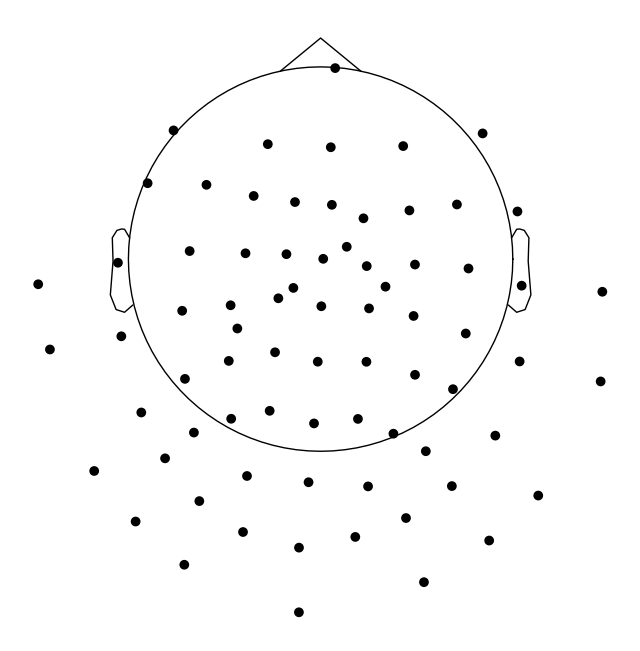

In [10]:
%matplotlib inline

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    raw.plot_sensors(kind='topomap', ch_type='eeg')

#### Plotting EEG electrodes in 3D

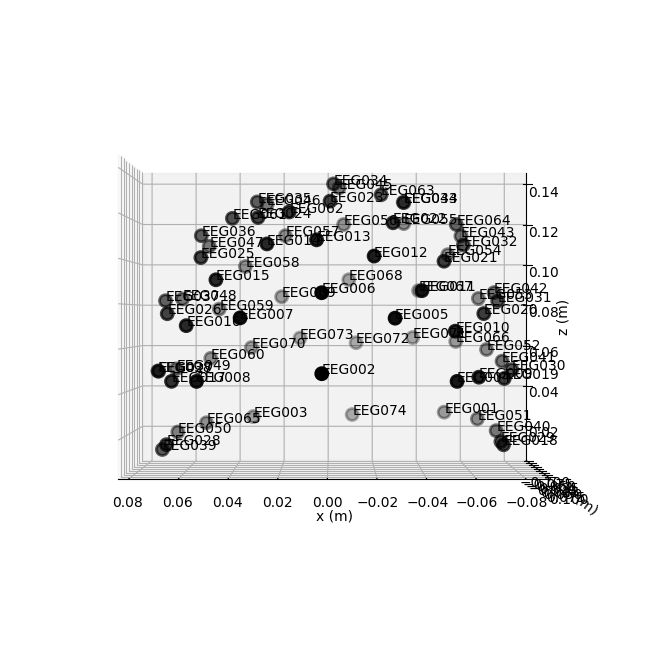

In [11]:
%matplotlib inline

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    raw.plot_sensors(kind='3d', ch_type='eeg', show_names=True)

#### Plotting MEG electrodes in 2D

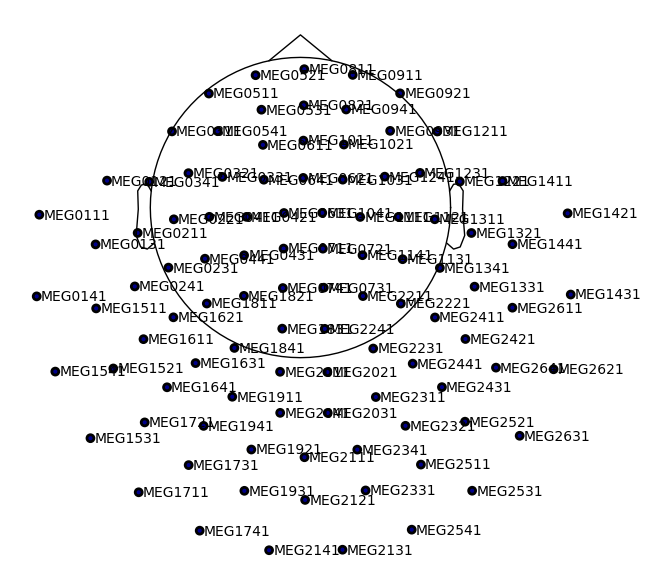

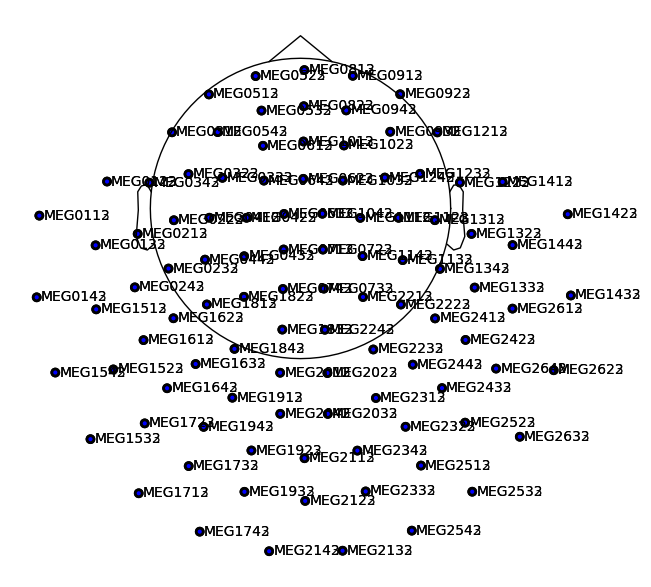

In [12]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    raw.plot_sensors(kind='topomap', ch_type='mag', show_names=True)  # Only MEG sensors MAG
    raw.plot_sensors(kind='topomap', ch_type='grad', show_names=True)  # Only MEG sensors


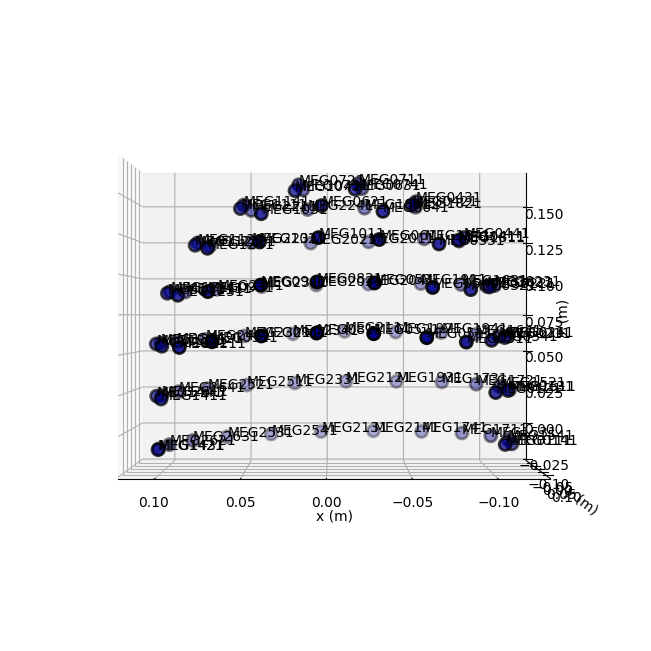

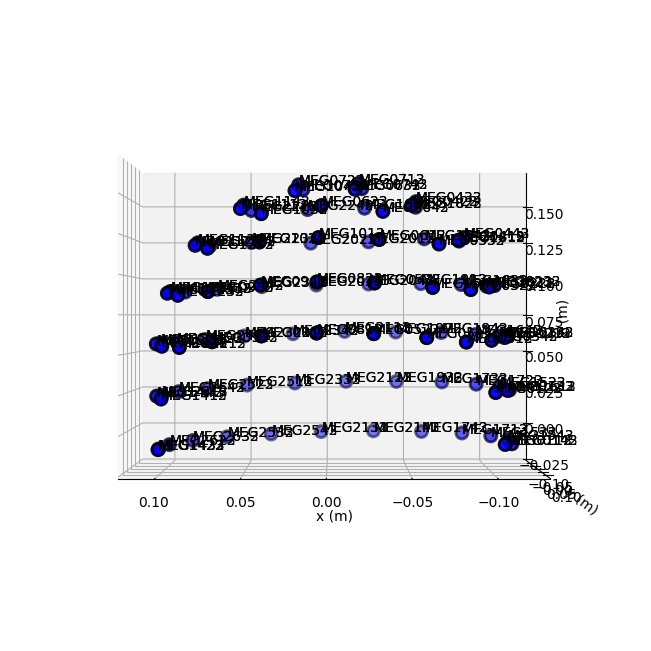

In [13]:
# Plotting magnetometers in 3D
%matplotlib inline
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    raw.plot_sensors(kind='3d', ch_type='mag', show_names=True)

# Plotting gradiometers in 3D
%matplotlib inline
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    raw.plot_sensors(kind='3d', ch_type='grad', show_names=True)

#### Plotting both EEG & MEG electrodes together & Calculating closest neighbours

- Plotting all electrodes

In [14]:
# Full code
import plotly.graph_objects as go
import numpy as np
import mne

# Get sensor positions
pos = raw._get_channel_positions() * 1000 # Convert to mm

# Create separate traces for EEG and MEG sensors
eeg_idx = mne.pick_types(raw.info, eeg=True, meg=False)
meg_idx = mne.pick_types(raw.info, meg=True, eeg=False)

# Create the 3D scatter plot
fig = go.Figure()

# Add EEG sensors
eeg_pos = pos[eeg_idx]
fig.add_trace(go.Scatter3d(
    x=eeg_pos[:, 0], y=eeg_pos[:, 1], z=eeg_pos[:, 2],
    mode='markers+text',
    marker=dict(size=8, color='blue'),
    text=[raw.ch_names[i] for i in eeg_idx],
    name='EEG'
))

# Add MEG sensors
meg_pos = pos[meg_idx]
fig.add_trace(go.Scatter3d(
    x=meg_pos[:, 0], y=meg_pos[:, 1], z=meg_pos[:, 2],
    mode='markers+text',
    marker=dict(size=8, color='red'),
    text=[raw.ch_names[i] for i in meg_idx],
    name='MEG'
))

# Find closest MEG electrode for each EEG electrode and plot line
closest_distances = []
for i, eeg_electrode in enumerate(eeg_pos):
    # Calculate distances to all MEG electrodes
    distances = np.sqrt(np.sum((meg_pos - eeg_electrode)**2, axis=1))
    
    # Find the closest MEG electrode
    closest_meg_idx = np.argmin(distances)
    closest_meg_electrode = meg_pos[closest_meg_idx]
    min_distance = distances[closest_meg_idx]
    closest_distances.append(min_distance)
    
    # Create line coordinates
    x_line = [eeg_electrode[0], closest_meg_electrode[0]]
    y_line = [eeg_electrode[1], closest_meg_electrode[1]]
    z_line = [eeg_electrode[2], closest_meg_electrode[2]]
    
    # Add line trace
    fig.add_trace(go.Scatter3d(
        x=x_line, y=y_line, z=z_line,
        mode='lines',
        line=dict(color='green', width=2),  # Made lines slightly thicker
        opacity=0.5,  # Made lines more visible
        showlegend=False,
        hoverinfo='text',
        text=f'Distance: {min_distance:.2f} mm'
    ))

# Update layout
fig.update_layout(
    title='EEG and MEG Sensor Positions with Shortest Distance Lines',
    scene=dict(
        xaxis_title='X (mm)',
        yaxis_title='Y (mm)',
        zaxis_title='Z (mm)',
        aspectmode='data'     

    ),
    width=800,
    height=800
)

# Save the plot as an HTML file
fig.write_html("sensor_positions_closest_distances.html")
print("Plot saved as 'sensor_positions_closest_distances.html'. You can open it in your web browser.")

# Print statistics about the closest distances
print(f"\nClosest Distance Statistics (in mm):")
print(f"Minimum distance: {min(closest_distances):.2f}")
print(f"Maximum distance: {max(closest_distances):.2f}")
print(f"Average distance: {np.mean(closest_distances):.2f}")
print(f"Standard deviation: {np.std(closest_distances):.2f}")

Plot saved as 'sensor_positions_closest_distances.html'. You can open it in your web browser.

Closest Distance Statistics (in mm):
Minimum distance: 5.97
Maximum distance: 40.00
Average distance: 22.01
Standard deviation: 7.34


- Plotting only the closely connected EEG and MEG electrode pairs (those that are in the bottom 25% of distance interquartile range)

In [15]:
import plotly.graph_objects as go
import numpy as np
import mne

# Get sensor positions and convert from meters to millimeters
pos = raw._get_channel_positions() * 1000  # Convert positions to mm

# Create separate indices for EEG and MEG sensors
eeg_idx = mne.pick_types(raw.info, eeg=True, meg=False)
meg_idx = mne.pick_types(raw.info, meg=True, eeg=False)

# EEG sensor positions and names
eeg_pos_full = pos[eeg_idx]
eeg_names_full = [raw.ch_names[i] for i in eeg_idx]

# MEG sensor positions and names
meg_pos_full = pos[meg_idx]
meg_names_full = [raw.ch_names[i] for i in meg_idx]

# Variables to store distances and indices
closest_distances = []
closest_meg_indices = []

# Track used MEG electrodes
used_meg_electrodes = set()

# Compute closest MEG electrode for each EEG electrode
for i, eeg_electrode in enumerate(eeg_pos_full):
    distances = np.linalg.norm(meg_pos_full - eeg_electrode, axis=1)
    sorted_indices = np.argsort(distances)
    
    # Find the closest unused MEG electrode
    for closest_meg_idx in sorted_indices:
        if closest_meg_idx not in used_meg_electrodes:
            min_distance = distances[closest_meg_idx]
            used_meg_electrodes.add(closest_meg_idx)
            closest_distances.append(min_distance)
            closest_meg_indices.append(closest_meg_idx)
            break

# Convert lists to numpy arrays for easier indexing
closest_distances = np.array(closest_distances)
closest_meg_indices = np.array(closest_meg_indices)

# Calculate quartiles
q1 = np.percentile(closest_distances, 25)
q3 = np.percentile(closest_distances, 75)
iqr = q3 - q1

# Find indices of EEG electrodes in the bottom 25%
bottom25_indices = np.where(closest_distances <= q1)[0]

# Filter EEG electrodes to only those in bottom 25%
eeg_pos = eeg_pos_full[bottom25_indices]
eeg_names = [eeg_names_full[i] for i in bottom25_indices]

# Get corresponding MEG indices and positions
closest_meg_indices_bottom25 = closest_meg_indices[bottom25_indices]
used_meg_indices = np.unique(closest_meg_indices_bottom25)
used_meg_pos = meg_pos_full[used_meg_indices]
used_meg_names = [meg_names_full[i] for i in used_meg_indices]

# Create the 3D scatter plot
fig = go.Figure()

# Add EEG sensors (Bottom 25%) to the plot
fig.add_trace(go.Scatter3d(
    x=eeg_pos[:, 0],
    y=eeg_pos[:, 1],
    z=eeg_pos[:, 2],
    mode='markers+text',
    marker=dict(size=5, color='blue'),
    text=eeg_names,
    name='EEG (Bottom 25%)'
))

# Add MEG sensors corresponding to the Bottom 25% EEG electrodes
fig.add_trace(go.Scatter3d(
    x=used_meg_pos[:, 0],
    y=used_meg_pos[:, 1],
    z=used_meg_pos[:, 2],
    mode='markers+text',
    marker=dict(size=5, color='red'),
    text=used_meg_names,
    name='MEG (Corresponding)'
))

# Add lines between EEG electrodes and their closest MEG electrodes
for i, eeg_electrode in enumerate(eeg_pos):
    closest_meg_idx = closest_meg_indices_bottom25[i]
    closest_meg_electrode = meg_pos_full[closest_meg_idx]
    min_distance = np.linalg.norm(closest_meg_electrode - eeg_electrode)
    
    x_line = [eeg_electrode[0], closest_meg_electrode[0]]
    y_line = [eeg_electrode[1], closest_meg_electrode[1]]
    z_line = [eeg_electrode[2], closest_meg_electrode[2]]
    
    # Add line trace
    fig.add_trace(go.Scatter3d(
        x=x_line,
        y=y_line,
        z=z_line,
        mode='lines',
        line=dict(color='green', width=2),
        opacity=0.8,
        showlegend=False,
        hoverinfo='text',
        text=f'Distance: {min_distance:.2f} mm'
    ))

# Update plot layout
fig.update_layout(
    title='EEG and MEG Sensor Positions (Bottom 25% Distances)',
    scene=dict(
        xaxis_title='X (mm)',
        yaxis_title='Y (mm)',
        zaxis_title='Z (mm)',
        aspectmode='data'  # Ensures equal scaling
    ),
    width=800,
    height=800
)

# Save the plot as an HTML file
fig.write_html("sensor_positions_bottom25.html")
print("Plot saved as 'sensor_positions_bottom25.html'. You can open it in your web browser.")

# Print distance statistics for bottom 25%
bottom25_distances = closest_distances[bottom25_indices]
print(f"\nBottom 25% Closest Distance Statistics (in mm):")
print(f"Minimum distance: {bottom25_distances.min():.2f}")
print(f"Maximum distance: {bottom25_distances.max():.2f}")
print(f"Average distance: {bottom25_distances.mean():.2f}")
print(f"Standard deviation: {bottom25_distances.std():.2f}")
print(f"Number of EEG electrodes in Bottom 25%: {len(bottom25_indices)}")
print(f"Number of MEG electrodes used: {len(used_meg_indices)}")

Plot saved as 'sensor_positions_bottom25.html'. You can open it in your web browser.

Bottom 25% Closest Distance Statistics (in mm):
Minimum distance: 5.97
Maximum distance: 16.30
Average distance: 13.58
Standard deviation: 2.84
Number of EEG electrodes in Bottom 25%: 19
Number of MEG electrodes used: 19


#### Plotting EEG spectogramm

Using matplotlib as 2D backend.


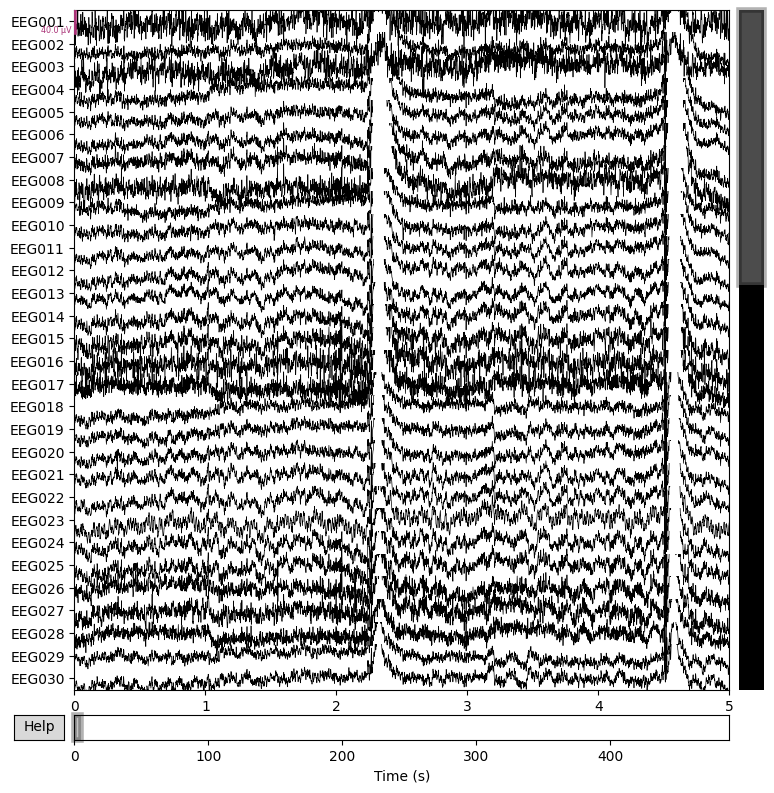

In [16]:
# Plot EEG data
eeg_indices = mne.pick_types(raw.info, meg=False, eeg=True)
raw.plot(picks=eeg_indices, duration=5, n_channels=30, title='EEG Data')
plt.show()

#### Plotting MEG spectogramm

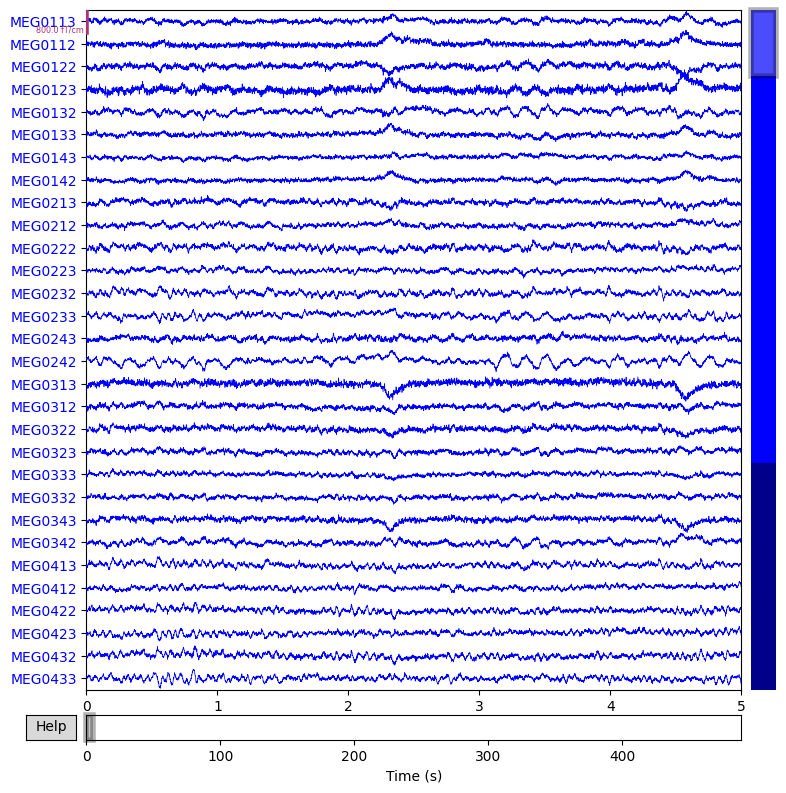

In [17]:
# Pick MEG channels
meg_indices = mne.pick_types(raw.info, meg=True, eeg=False)

# Plot MEG data
raw.plot(picks=meg_indices, duration=5, n_channels=30, title='MEG Data')
plt.show()


Number of EEG channels: 74
Number of MEG channels: 306
EEG data shape: (74, 537900)
MEG data shape: (306, 537900)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.862 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_69085/264725723.py:19: RuntimeWarning:

(X, Y) fit (-3.0, 35.9) more than 20 mm from head frame origin



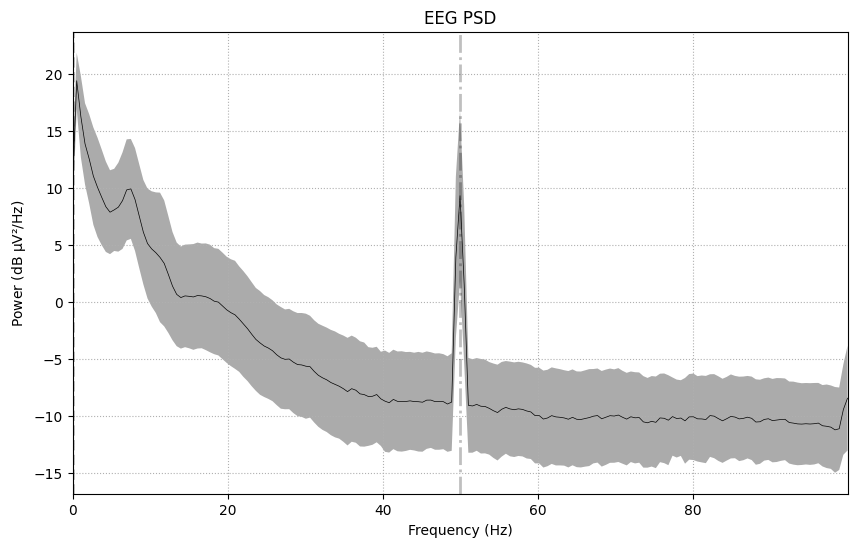

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.862 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.862 (s)


/tmp/ipykernel_69085/264725723.py:29: RuntimeWarning:

(X, Y) fit (-3.0, 35.9) more than 20 mm from head frame origin



Plotting power spectral density (dB=True).


/tmp/ipykernel_69085/264725723.py:32: RuntimeWarning:

(X, Y) fit (-3.0, 35.9) more than 20 mm from head frame origin



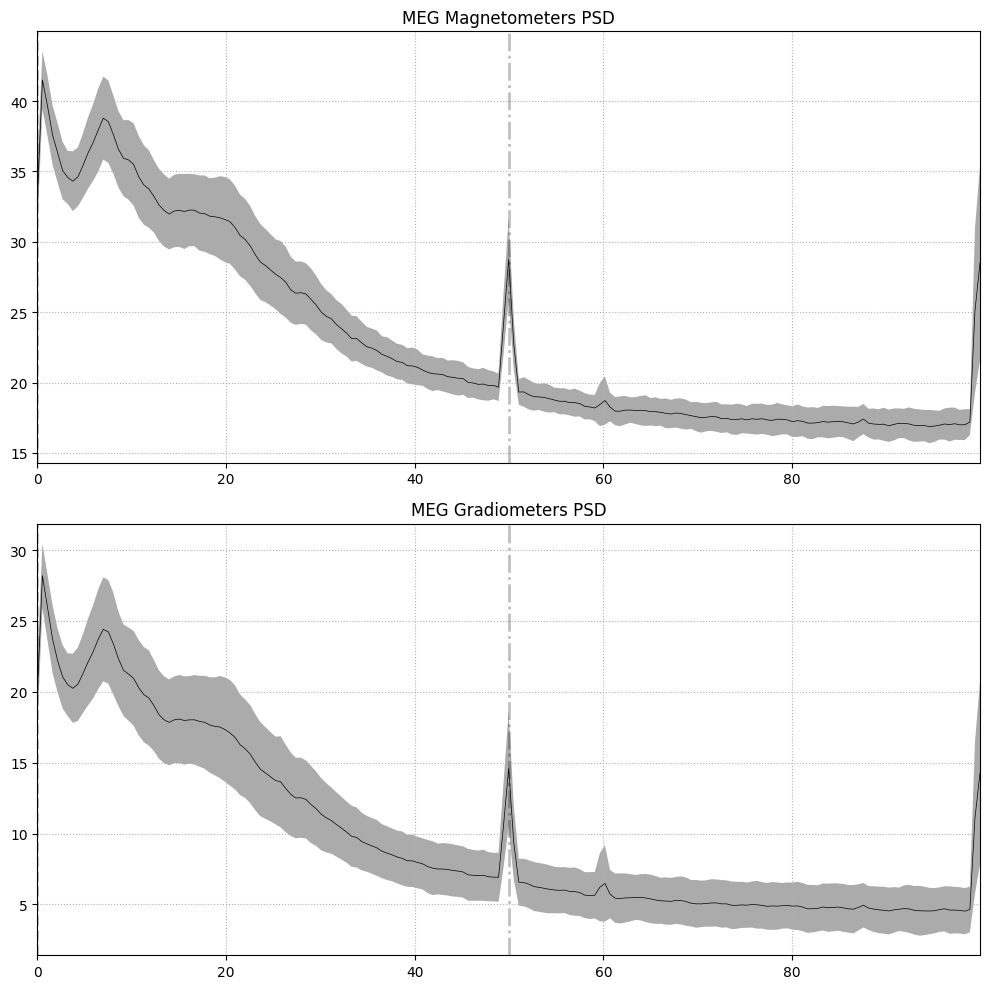

292 events found on stim channel STI101
Event IDs: [   5    6    7   13   14   15   17   18   19  256  261  262  263  269
  270  273  274 4096 4101 4103 4109 4110 4113 4114 4115]
Found 292 events.
[[158992      0      5]
 [160126      0   4096]
 [162409      0      6]
 [163526      0   4096]
 [165790      0     17]
 [166995      0    256]
 [169245      0     18]
 [169988     18    274]
 [172736      0     13]
 [174321      0    256]
 [176172      0     14]
 [177551      0    256]
 [179572      0     17]
 [181699      0    256]
 [182953      0     13]
 [184641      0    256]
 [186370      0     14]
 [187847      0    256]
 [189880      0     17]
 [191445      0    256]
 [193427      0     18]
 [194740      0    256]
 [196881      0      5]
 [198690      0    256]
 [200207      0     17]
 [201623      0   4096]
 [203717      0      5]
 [205165      0   4096]
 [207209      0     19]
 [209093      0   4096]
 [210865      0     17]
 [212748      0   4096]
 [214265      0      5]
 [215916   

In [18]:

# Channel Indices
eeg_indices = mne.pick_types(raw.info, meg=False, eeg=True)
meg_indices = mne.pick_types(raw.info, meg=True, eeg=False)
print(f'Number of EEG channels: {len(eeg_indices)}')
print(f'Number of MEG channels: {len(meg_indices)}')

# EEG and MEG Data
eeg_data = data[eeg_indices, :]
meg_data = data[meg_indices, :]
print(f'EEG data shape: {eeg_data.shape}')
print(f'MEG data shape: {meg_data.shape}')

# Units Conversion
eeg_data_uv = eeg_data * 1e6  # Convert EEG data to µV
meg_data_ft = meg_data * 1e15  # Convert MEG data to fT (magnetometers)

# Power Spectral Density for EEG
fig, ax = plt.subplots(figsize=(10, 6))
raw.plot_psd(picks=eeg_indices, fmax=100, average=True, spatial_colors=False, ax=ax)
ax.set_title('EEG PSD')
plt.show()

# Power Spectral Density for MEG
# Separate plots for magnetometers and gradiometers
mag_indices = mne.pick_types(raw.info, meg='mag')
grad_indices = mne.pick_types(raw.info, meg='grad')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
raw.plot_psd(picks=mag_indices, fmax=100, average=True, spatial_colors=False, ax=ax1)
ax1.set_title('MEG Magnetometers PSD')

raw.plot_psd(picks=grad_indices, fmax=100, average=True, spatial_colors=False, ax=ax2)
ax2.set_title('MEG Gradiometers PSD')
plt.tight_layout()
plt.show()


# Events and Annotations
events = mne.find_events(raw, stim_channel='STI101')
print(f'Found {len(events)} events.')
print(events)
print('Annotations:')
print(raw.annotations)

# Measurement Info
print('Measurement Info:')
pprint(raw.info)

# Inter-subject data exploration

In [14]:
import os

def checkDataIntegrity(datasetPath):
    ### iterate through mode folders (train, test, val)
    for modeFolder in os.listdir(datasetPath):
        if ".zip" in modeFolder or modeFolder[0] == ".":
            continue
        assert os.path.isdir(os.path.join(datasetPath,modeFolder)), f"Dataset folder contains unexpected file: {modeFolder}"
        assert modeFolder == "train" or modeFolder == "val" or modeFolder == "test", f"Dataset folder contains unexpected folder: {modeFolder} (expected train, test and val)"
        ### iterate through subject folders in dataset folder
        for subjectFolder in os.listdir(os.path.join(datasetPath, modeFolder)):
            assert os.path.isdir(os.path.join(datasetPath,modeFolder,subjectFolder)), f"Dataset folder contains unexpected file: {modeFolder}/{subjectFolder}"
            assert len(os.listdir(os.path.join(datasetPath,modeFolder,subjectFolder)))>0, f"Subject folder {modeFolder}/{subjectFolder} unexpectedly empty"
            ### iterate through run files in subject folders
            for file in os.listdir(os.path.join(datasetPath,modeFolder,subjectFolder)):
                assert ".txt" in file or ".fif" in file, f"Unexpected file {file} in folder {modeFolder}/{subjectFolder}"


datasetPath = "../data/openfmri/"
checkDataIntegrity(datasetPath)

In [17]:
modes = ['train','test','val']
subject_dict = {mode: {} for mode in modes}

for mode in modes:
    for subjectFolder in os.listdir(os.path.join(datasetPath, mode)):
        subject_dict[mode][subjectFolder] = []
        for file in os.listdir(os.path.join(datasetPath, mode, subjectFolder)):
            if ".fif" in file:
                subject_dict[mode][subjectFolder].append(file)

train_subject_dict = subject_dict['train']
val_subject_dict = subject_dict['val']
test_subject_dict = subject_dict['test']

print(subject_dict)

{'train': {'sub-01': ['run_06.fif', 'run_05.fif', 'run_01.fif', 'run_04.fif', 'run_02.fif', 'run_03.fif'], 'sub-16': ['run_06.fif', 'run_05.fif', 'run_01.fif', 'run_04.fif', 'run_02.fif', 'run_03.fif'], 'sub-12': ['run_06.fif', 'run_05.fif', 'run_01.fif', 'run_04.fif', 'run_02.fif', 'run_03.fif'], 'sub-08': ['run_06.fif', 'run_05.fif', 'run_01.fif', 'run_04.fif', 'run_02.fif', 'run_03.fif'], 'sub-04': ['run_06.fif', 'run_05.fif', 'run_01.fif', 'run_04.fif', 'run_02.fif', 'run_03.fif'], 'sub-02': ['run_06.fif', 'run_05.fif', 'run_01.fif', 'run_04.fif', 'run_02.fif', 'run_03.fif'], 'sub-13': ['run_06.fif', 'run_05.fif', 'run_01.fif', 'run_04.fif', 'run_02.fif', 'run_03.fif'], 'sub-15': ['run_06.fif', 'run_05.fif', 'run_01.fif', 'run_04.fif', 'run_02.fif', 'run_03.fif'], 'sub-07': ['run_06.fif', 'run_05.fif', 'run_01.fif', 'run_04.fif', 'run_02.fif', 'run_03.fif'], 'sub-05': ['run_06.fif', 'run_05.fif', 'run_01.fif', 'run_04.fif', 'run_02.fif'], 'sub-10': ['run_06.fif', 'run_05.fif', 'run

In [24]:
import mne
import matplotlib.pyplot as plt

# Initialize dictionaries to store the number of frames and sampling rates per participant and per run
frames_count = {mode: {} for mode in modes}
sampling_rates = {mode: {} for mode in modes}

# Iterate over each mode and participant to calculate the number of frames and track sampling rates
for mode, participants in subject_dict.items():
    for participant, runs in participants.items():
        frames_count[mode][participant] = []
        sampling_rates[mode][participant] = []
        for run in runs:
            fif_file = os.path.join(datasetPath, mode, participant, run)
            raw = mne.io.read_raw_fif(fif_file, preload=True)
            frames_count[mode][participant].append(raw.n_times)
            sampling_rates[mode][participant].append(raw.info['sfreq'])


Opening raw data file ../data/openfmri/train/sub-01/run_06.fif...
    Range : 53900 ... 603899 =     49.000 ...   548.999 secs
Ready.
Reading 0 ... 549999  =      0.000 ...   499.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-01/run_06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-01/run_05.fif...
    Range : 77000 ... 632499 =     70.000 ...   574.999 secs
Ready.
Reading 0 ... 555499  =      0.000 ...   504.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-01/run_05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-01/run_01.fif...
    Range : 248600 ... 788699 =    226.000 ...   716.999 secs
Ready.
Reading 0 ... 540099  =      0.000 ...   490.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-01/run_01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-01/run_04.fif...
    Range : 47300 ... 589599 =     43.000 ...   535.999 secs
Ready.
Reading 0 ... 542299  =      0.000 ...   492.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-01/run_04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-01/run_02.fif...
    Range : 68200 ... 614899 =     62.000 ...   558.999 secs
Ready.
Reading 0 ... 546699  =      0.000 ...   496.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-01/run_02.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-01/run_03.fif...
    Range : 63800 ... 619299 =     58.000 ...   562.999 secs
Ready.
Reading 0 ... 555499  =      0.000 ...   504.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-01/run_03.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-16/run_06.fif...
    Range : 27500 ... 568699 =     25.000 ...   516.999 secs
Ready.
Reading 0 ... 541199  =      0.000 ...   491.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-16/run_06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-16/run_05.fif...
    Range : 60500 ... 602799 =     55.000 ...   547.999 secs
Ready.
Reading 0 ... 542299  =      0.000 ...   492.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-16/run_05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-16/run_01.fif...
    Range : 24200 ... 566499 =     22.000 ...   514.999 secs
Ready.
Reading 0 ... 542299  =      0.000 ...   492.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-16/run_01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-16/run_04.fif...
    Range : 36300 ... 582999 =     33.000 ...   529.999 secs
Ready.
Reading 0 ... 546699  =      0.000 ...   496.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-16/run_04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-16/run_02.fif...
    Range : 31900 ... 581899 =     29.000 ...   528.999 secs
Ready.
Reading 0 ... 549999  =      0.000 ...   499.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-16/run_02.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-16/run_03.fif...
    Range : 40700 ... 588499 =     37.000 ...   534.999 secs
Ready.
Reading 0 ... 547799  =      0.000 ...   497.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-16/run_03.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-12/run_06.fif...
    Range : 59400 ... 600599 =     54.000 ...   545.999 secs
Ready.
Reading 0 ... 541199  =      0.000 ...   491.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-12/run_06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-12/run_05.fif...
    Range : 166100 ... 712799 =    151.000 ...   647.999 secs
Ready.
Reading 0 ... 546699  =      0.000 ...   496.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-12/run_05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-12/run_01.fif...
    Range : 189200 ... 730399 =    172.000 ...   663.999 secs
Ready.
Reading 0 ... 541199  =      0.000 ...   491.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-12/run_01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-12/run_04.fif...
    Range : 58300 ... 608299 =     53.000 ...   552.999 secs
Ready.
Reading 0 ... 549999  =      0.000 ...   499.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-12/run_04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-12/run_02.fif...
    Range : 123200 ... 666599 =    112.000 ...   605.999 secs
Ready.
Reading 0 ... 543399  =      0.000 ...   493.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-12/run_02.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-12/run_03.fif...
    Range : 27500 ... 571999 =     25.000 ...   519.999 secs
Ready.
Reading 0 ... 544499  =      0.000 ...   494.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-12/run_03.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-08/run_06.fif...
    Range : 126500 ... 666599 =    115.000 ...   605.999 secs
Ready.
Reading 0 ... 540099  =      0.000 ...   490.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-08/run_06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-08/run_05.fif...
    Range : 88000 ... 633599 =     80.000 ...   575.999 secs
Ready.
Reading 0 ... 545599  =      0.000 ...   495.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-08/run_05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-08/run_01.fif...
    Range : 258500 ... 808499 =    235.000 ...   734.999 secs
Ready.
Reading 0 ... 549999  =      0.000 ...   499.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-08/run_01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-08/run_04.fif...
    Range : 173800 ... 716099 =    158.000 ...   650.999 secs
Ready.
Reading 0 ... 542299  =      0.000 ...   492.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-08/run_04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-08/run_02.fif...
    Range : 102300 ... 644599 =     93.000 ...   585.999 secs
Ready.
Reading 0 ... 542299  =      0.000 ...   492.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-08/run_02.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-08/run_03.fif...
    Range : 30800 ... 577499 =     28.000 ...   524.999 secs
Ready.
Reading 0 ... 546699  =      0.000 ...   496.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-08/run_03.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-04/run_06.fif...
    Range : 41800 ... 588499 =     38.000 ...   534.999 secs
Ready.
Reading 0 ... 546699  =      0.000 ...   496.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-04/run_06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-04/run_05.fif...
    Range : 63800 ... 612699 =     58.000 ...   556.999 secs
Ready.
Reading 0 ... 548899  =      0.000 ...   498.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-04/run_05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-04/run_01.fif...
    Range : 24200 ... 570899 =     22.000 ...   518.999 secs
Ready.
Reading 0 ... 546699  =      0.000 ...   496.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-04/run_01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-04/run_04.fif...
    Range : 50600 ... 593999 =     46.000 ...   539.999 secs
Ready.
Reading 0 ... 543399  =      0.000 ...   493.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-04/run_04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-04/run_02.fif...
    Range : 183700 ... 720499 =    167.000 ...   654.999 secs
Ready.
Reading 0 ... 536799  =      0.000 ...   487.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-04/run_02.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-04/run_03.fif...
    Range : 39600 ... 586299 =     36.000 ...   532.999 secs
Ready.
Reading 0 ... 546699  =      0.000 ...   496.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-04/run_03.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-02/run_06.fif...
    Range : 28600 ... 567599 =     26.000 ...   515.999 secs
Ready.
Reading 0 ... 538999  =      0.000 ...   489.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-02/run_06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-02/run_05.fif...
    Range : 67100 ... 610499 =     61.000 ...   554.999 secs
Ready.
Reading 0 ... 543399  =      0.000 ...   493.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-02/run_05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-02/run_01.fif...
    Range : 222200 ... 765599 =    202.000 ...   695.999 secs
Ready.
Reading 0 ... 543399  =      0.000 ...   493.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-02/run_01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-02/run_04.fif...
    Range : 79200 ... 632499 =     72.000 ...   574.999 secs
Ready.
Reading 0 ... 553299  =      0.000 ...   502.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-02/run_04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-02/run_02.fif...
    Range : 47300 ... 589599 =     43.000 ...   535.999 secs
Ready.
Reading 0 ... 542299  =      0.000 ...   492.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-02/run_02.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-02/run_03.fif...
    Range : 35200 ... 576399 =     32.000 ...   523.999 secs
Ready.
Reading 0 ... 541199  =      0.000 ...   491.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-02/run_03.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-13/run_06.fif...
    Range : 94600 ... 654499 =     86.000 ...   594.999 secs
Ready.
Reading 0 ... 559899  =      0.000 ...   508.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-13/run_06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-13/run_05.fif...
    Range : 89100 ... 625899 =     81.000 ...   568.999 secs
Ready.
Reading 0 ... 536799  =      0.000 ...   487.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-13/run_05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-13/run_01.fif...
    Range : 314600 ... 853599 =    286.000 ...   775.999 secs
Ready.
Reading 0 ... 538999  =      0.000 ...   489.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-13/run_01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-13/run_04.fif...
    Range : 35200 ... 573099 =     32.000 ...   520.999 secs
Ready.
Reading 0 ... 537899  =      0.000 ...   488.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-13/run_04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-13/run_02.fif...
    Range : 165000 ... 708399 =    150.000 ...   643.999 secs
Ready.
Reading 0 ... 543399  =      0.000 ...   493.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-13/run_02.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-13/run_03.fif...
    Range : 78100 ... 617099 =     71.000 ...   560.999 secs
Ready.
Reading 0 ... 538999  =      0.000 ...   489.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-13/run_03.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-15/run_06.fif...
    Range : 49500 ... 586299 =     45.000 ...   532.999 secs
Ready.
Reading 0 ... 536799  =      0.000 ...   487.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-15/run_06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-15/run_05.fif...
    Range : 77000 ... 614899 =     70.000 ...   558.999 secs
Ready.
Reading 0 ... 537899  =      0.000 ...   488.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-15/run_05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-15/run_01.fif...
    Range : 50600 ... 590699 =     46.000 ...   536.999 secs
Ready.
Reading 0 ... 540099  =      0.000 ...   490.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-15/run_01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-15/run_04.fif...
    Range : 24200 ... 570899 =     22.000 ...   518.999 secs
Ready.
Reading 0 ... 546699  =      0.000 ...   496.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-15/run_04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-15/run_02.fif...
    Range : 48400 ... 586299 =     44.000 ...   532.999 secs
Ready.
Reading 0 ... 537899  =      0.000 ...   488.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-15/run_02.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-15/run_03.fif...
    Range : 35200 ... 576399 =     32.000 ...   523.999 secs
Ready.
Reading 0 ... 541199  =      0.000 ...   491.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-15/run_03.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-07/run_06.fif...
    Range : 53900 ... 597299 =     49.000 ...   542.999 secs
Ready.
Reading 0 ... 543399  =      0.000 ...   493.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-07/run_06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-07/run_05.fif...
    Range : 58300 ... 597299 =     53.000 ...   542.999 secs
Ready.
Reading 0 ... 538999  =      0.000 ...   489.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-07/run_05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-07/run_01.fif...
    Range : 147400 ... 689699 =    134.000 ...   626.999 secs
Ready.
Reading 0 ... 542299  =      0.000 ...   492.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-07/run_01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-07/run_04.fif...
    Range : 240900 ... 775499 =    219.000 ...   704.999 secs
Ready.
Reading 0 ... 534599  =      0.000 ...   485.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-07/run_04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-07/run_02.fif...
    Range : 74800 ... 615999 =     68.000 ...   559.999 secs
Ready.
Reading 0 ... 541199  =      0.000 ...   491.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-07/run_02.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-07/run_03.fif...
    Range : 67100 ... 617099 =     61.000 ...   560.999 secs
Ready.
Reading 0 ... 549999  =      0.000 ...   499.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-07/run_03.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-05/run_06.fif...
    Range : 55000 ... 591799 =     50.000 ...   537.999 secs
Ready.
Reading 0 ... 536799  =      0.000 ...   487.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-05/run_06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-05/run_05.fif...
    Range : 41800 ... 591799 =     38.000 ...   537.999 secs
Ready.
Reading 0 ... 549999  =      0.000 ...   499.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-05/run_05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-05/run_01.fif...
    Range : 141900 ... 681999 =    129.000 ...   619.999 secs
Ready.
Reading 0 ... 540099  =      0.000 ...   490.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-05/run_01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-05/run_04.fif...
    Range : 72600 ... 608299 =     66.000 ...   552.999 secs
Ready.
Reading 0 ... 535699  =      0.000 ...   486.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-05/run_04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-05/run_02.fif...
    Range : 114400 ... 668799 =    104.000 ...   607.999 secs
Ready.
Reading 0 ... 554399  =      0.000 ...   503.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-05/run_02.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-10/run_06.fif...
    Range : 47300 ... 590699 =     43.000 ...   536.999 secs
Ready.
Reading 0 ... 543399  =      0.000 ...   493.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-10/run_06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-10/run_05.fif...
    Range : 104500 ... 668799 =     95.000 ...   607.999 secs
Ready.
Reading 0 ... 564299  =      0.000 ...   512.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-10/run_05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-10/run_01.fif...
    Range : 235400 ... 785399 =    214.000 ...   713.999 secs
Ready.
Reading 0 ... 549999  =      0.000 ...   499.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-10/run_01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-10/run_04.fif...
    Range : 50600 ... 595099 =     46.000 ...   540.999 secs
Ready.
Reading 0 ... 544499  =      0.000 ...   494.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-10/run_04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-10/run_02.fif...
    Range : 88000 ... 628099 =     80.000 ...   570.999 secs
Ready.
Reading 0 ... 540099  =      0.000 ...   490.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-10/run_02.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/train/sub-10/run_03.fif...
    Range : 36300 ... 580799 =     33.000 ...   527.999 secs
Ready.
Reading 0 ... 544499  =      0.000 ...   494.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/train/sub-10/run_03.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/test/sub-14/run_06.fif...
    Range : 104500 ... 651199 =     95.000 ...   591.999 secs
Ready.
Reading 0 ... 546699  =      0.000 ...   496.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/test/sub-14/run_06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/test/sub-14/run_05.fif...
    Range : 49500 ... 597299 =     45.000 ...   542.999 secs
Ready.
Reading 0 ... 547799  =      0.000 ...   497.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/test/sub-14/run_05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/test/sub-14/run_01.fif...
    Range : 380600 ... 921799 =    346.000 ...   837.999 secs
Ready.
Reading 0 ... 541199  =      0.000 ...   491.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/test/sub-14/run_01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/test/sub-14/run_04.fif...
    Range : 71500 ... 610499 =     65.000 ...   554.999 secs
Ready.
Reading 0 ... 538999  =      0.000 ...   489.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/test/sub-14/run_04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/test/sub-14/run_02.fif...
    Range : 82500 ... 632499 =     75.000 ...   574.999 secs
Ready.
Reading 0 ... 549999  =      0.000 ...   499.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/test/sub-14/run_02.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/test/sub-14/run_03.fif...
    Range : 61600 ... 632499 =     56.000 ...   574.999 secs
Ready.
Reading 0 ... 570899  =      0.000 ...   518.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/test/sub-14/run_03.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/test/sub-06/run_06.fif...
    Range : 26400 ... 568699 =     24.000 ...   516.999 secs
Ready.
Reading 0 ... 542299  =      0.000 ...   492.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/test/sub-06/run_06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/test/sub-06/run_05.fif...
    Range : 39600 ... 581899 =     36.000 ...   528.999 secs
Ready.
Reading 0 ... 542299  =      0.000 ...   492.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/test/sub-06/run_05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/test/sub-06/run_01.fif...
    Range : 132000 ... 669899 =    120.000 ...   608.999 secs
Ready.
Reading 0 ... 537899  =      0.000 ...   488.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/test/sub-06/run_01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/test/sub-06/run_04.fif...
    Range : 36300 ... 578599 =     33.000 ...   525.999 secs
Ready.
Reading 0 ... 542299  =      0.000 ...   492.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/test/sub-06/run_04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/test/sub-06/run_02.fif...
    Range : 48400 ... 584099 =     44.000 ...   530.999 secs
Ready.
Reading 0 ... 535699  =      0.000 ...   486.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/test/sub-06/run_02.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/test/sub-06/run_03.fif...
    Range : 45100 ... 592899 =     41.000 ...   538.999 secs
Ready.
Reading 0 ... 547799  =      0.000 ...   497.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/test/sub-06/run_03.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/val/sub-03/run_06.fif...
    Range : 73700 ... 624799 =     67.000 ...   567.999 secs
Ready.
Reading 0 ... 551099  =      0.000 ...   500.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/val/sub-03/run_06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/val/sub-03/run_05.fif...
    Range : 82500 ... 625899 =     75.000 ...   568.999 secs
Ready.
Reading 0 ... 543399  =      0.000 ...   493.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/val/sub-03/run_05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/val/sub-03/run_01.fif...
    Range : 423500 ... 980099 =    385.000 ...   890.999 secs
Ready.
Reading 0 ... 556599  =      0.000 ...   505.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/val/sub-03/run_01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/val/sub-03/run_04.fif...
    Range : 82500 ... 629199 =     75.000 ...   571.999 secs
Ready.
Reading 0 ... 546699  =      0.000 ...   496.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/val/sub-03/run_04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/val/sub-03/run_03.fif...
    Range : 44000 ... 598399 =     40.000 ...   543.999 secs
Ready.
Reading 0 ... 554399  =      0.000 ...   503.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/val/sub-03/run_03.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/val/sub-11/run_06.fif...
    Range : 33000 ... 569799 =     30.000 ...   517.999 secs
Ready.
Reading 0 ... 536799  =      0.000 ...   487.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/val/sub-11/run_06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/val/sub-11/run_05.fif...
    Range : 46200 ... 584099 =     42.000 ...   530.999 secs
Ready.
Reading 0 ... 537899  =      0.000 ...   488.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/val/sub-11/run_05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/val/sub-11/run_01.fif...
    Range : 173800 ... 712799 =    158.000 ...   647.999 secs
Ready.
Reading 0 ... 538999  =      0.000 ...   489.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/val/sub-11/run_01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/val/sub-11/run_04.fif...
    Range : 67100 ... 604999 =     61.000 ...   549.999 secs
Ready.
Reading 0 ... 537899  =      0.000 ...   488.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/val/sub-11/run_04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/val/sub-11/run_02.fif...
    Range : 34100 ... 579699 =     31.000 ...   526.999 secs
Ready.
Reading 0 ... 545599  =      0.000 ...   495.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/val/sub-11/run_02.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/val/sub-11/run_03.fif...
    Range : 48400 ... 592899 =     44.000 ...   538.999 secs
Ready.
Reading 0 ... 544499  =      0.000 ...   494.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/val/sub-11/run_03.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/val/sub-09/run_06.fif...
    Range : 102300 ... 645699 =     93.000 ...   586.999 secs
Ready.
Reading 0 ... 543399  =      0.000 ...   493.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/val/sub-09/run_06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/val/sub-09/run_05.fif...
    Range : 36300 ... 576399 =     33.000 ...   523.999 secs
Ready.
Reading 0 ... 540099  =      0.000 ...   490.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/val/sub-09/run_05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/val/sub-09/run_01.fif...
    Range : 140800 ... 680899 =    128.000 ...   618.999 secs
Ready.
Reading 0 ... 540099  =      0.000 ...   490.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/val/sub-09/run_01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/val/sub-09/run_04.fif...
    Range : 148500 ... 689699 =    135.000 ...   626.999 secs
Ready.
Reading 0 ... 541199  =      0.000 ...   491.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/val/sub-09/run_04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/val/sub-09/run_02.fif...
    Range : 51700 ... 596199 =     47.000 ...   541.999 secs
Ready.
Reading 0 ... 544499  =      0.000 ...   494.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/val/sub-09/run_02.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Opening raw data file ../data/openfmri/val/sub-09/run_03.fif...
    Range : 68200 ... 612699 =     62.000 ...   556.999 secs
Ready.
Reading 0 ... 544499  =      0.000 ...   494.999 secs...


/tmp/ipykernel_70322/4017768588.py:15: RuntimeWarning: This filename (../data/openfmri/val/sub-09/run_03.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


In [29]:
# Flatten the sampling_rates dictionary
flat_sampling_rates = [rate for mode in sampling_rates.values() for participant in mode.values() for rate in participant]

# Assert that all sampling rates are the same
assert all(rate == flat_sampling_rates[0] for rate in flat_sampling_rates), "Not all sampling rates are the same"
print(f"All sampling rates are consistent at {flat_sampling_rates[0]:.0f}Hz.")

All sampling rates are consistent at 1100Hz.


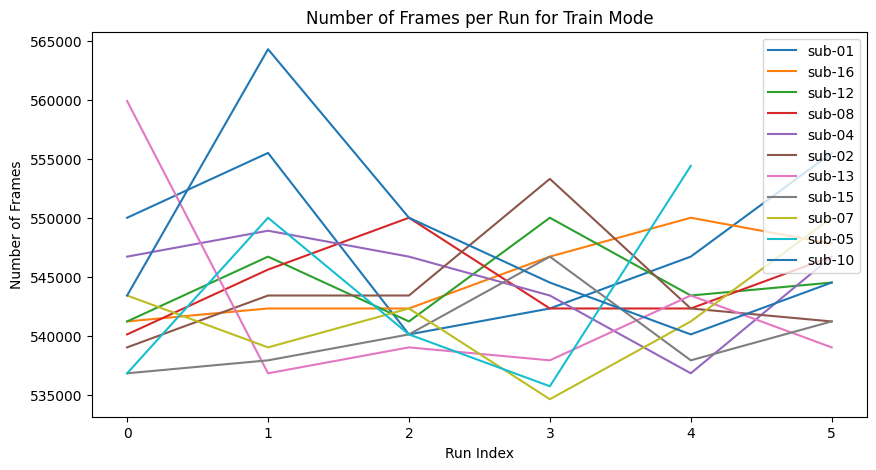

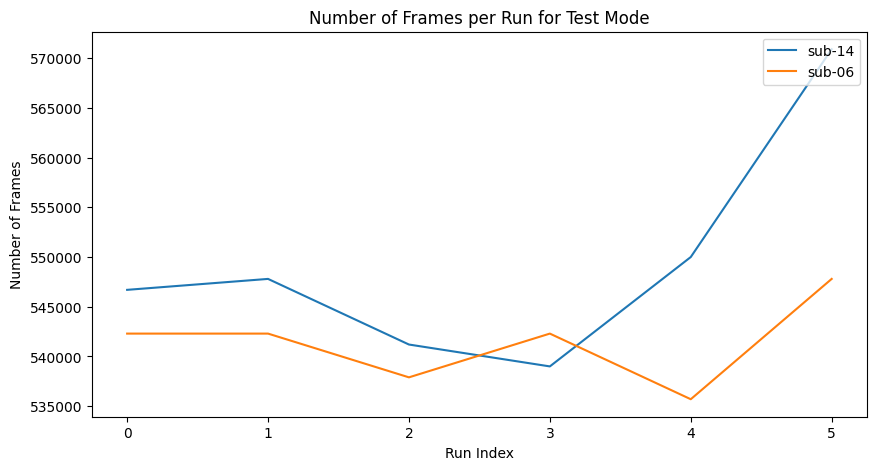

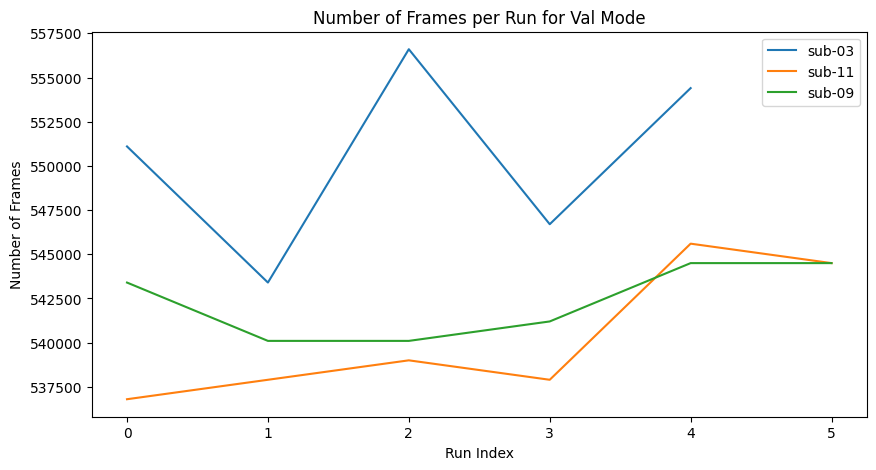

In [25]:

# Plot the number of frames per participant
for mode, participants in frames_count.items():
    plt.figure(figsize=(10, 5))
    for participant, frames in participants.items():
        plt.plot(frames, label=participant)
    plt.title(f'Number of Frames per Run for {mode.capitalize()} Mode')
    plt.xlabel('Run Index')
    plt.ylabel('Number of Frames')
    plt.legend(loc='upper right')
    plt.show()
